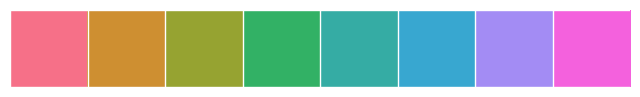

In [908]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.dates as mdates

In [866]:
df1=pd.read_csv(path2+'Data Logger Download.csv')
df1=df1[['Date&Time','PM2.5_FEM_MC','PM10_MC','UF Aggregated Conc.']][1:-8].reset_index()
del df1['index']
df1['Date&Time']=df1['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))
df1.columns=['time','PM2.5 (ug/m3)','PM10 (ug/m3)','TNC (#/cm3)']
df1['PM2.5 (ug/m3)']=pd.to_numeric(df1['PM2.5 (ug/m3)'], errors='coerce')
df1['PM10 (ug/m3)']=pd.to_numeric(df1['PM10 (ug/m3)'], errors='coerce')
df1['TNC (#/cm3)']=pd.to_numeric(df1['TNC (#/cm3)'], errors='coerce')

#df1=df1.replace(0,np.nan)
num=df1._get_numeric_data()
num[num<=0]=np.nan
#df1[(num[num<=0]).any(1)]                   # CHECK DELETING NEGATIVES
df1=df1.dropna()

times=pd.DatetimeIndex(df1.time)

df1_hr=df1.groupby([times.month, times.day, times.hour]).mean().reset_index()
df1_hr=df1_hr.rename(columns={'level_0':'month','level_1':'day','level_2':'hour'})
df1_hr['year']=2017
df1_hr['date']=pd.to_datetime(df1_hr[['year','month','day','hour']])
del df1_hr['year'], df1_hr['month'], df1_hr['day'], df1_hr['hour']

df1_daily=df1.groupby([times.month, times.day]).mean().reset_index()
df1_daily=df1_daily.rename(columns={'level_0':'month','level_1':'day'})
df1_daily['year']=2017
df1_daily['date']=pd.to_datetime(df1_daily[['year','month','day']])
del df1_daily['year'], df1_daily['month'], df1_daily['day']

In [868]:
df2=pd.read_csv(path2+'TSI3031_20170701.TXT',delimiter='\t')
df2=df2[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]
df2['start']=df2['start'].apply(lambda x: parse(x))
df2['end']=df2['end'].apply(lambda x: parse(x))

#df2=df2.replace(0,np.nan)
num2=df2._get_numeric_data()
num2[num2<=0]=np.nan
#df2[(num[num<=0]).any(1)]                   # CHECK DELETING NEGATIVES
df2=df2.dropna()

times=pd.DatetimeIndex(df2.start)

df2_hr=df2.groupby([times.month, times.day, times.hour]).mean().reset_index()
df2_hr=df2_hr.rename(columns={'level_0':'month','level_1':'day','level_2':'hour'})
df2_hr['year']=2017
df2_hr['date']=pd.to_datetime(df2_hr[['year','month','day','hour']])
del df2_hr['year'], df2_hr['month'], df2_hr['day'], df2_hr['hour']

df2_daily=df2.groupby([times.month, times.day]).mean().reset_index()
df2_daily=df2_daily.rename(columns={'level_0':'month','level_1':'day'})
df2_daily['year']=2017
df2_daily['date']=pd.to_datetime(df2_daily[['year','month','day']])
del df2_daily['year'], df2_daily['month'], df2_daily['day']

In [ ]:
df_hr=df1_hr.set_index('date').join(df2_hr.set_index('date')).reset_index()
df_daily=df1_daily.set_index('date').join(df2_daily.set_index('date')).reset_index()

In [885]:
# PEGASOR INDOOR SN-135 FROM REALECO
ildsa=pd.read_excel(path2+'realeco_sn0135-ldsa_2017-06-30t144100_2017-07-14t144100.xlsx')
ipm=pd.read_excel(path2+'realeco_sn0135-pm25_2017-06-30t145200_2017-07-14t145200.xlsx')
ipn=pd.read_excel(path2+'realeco_sn0135-pn_2017-06-30t145300_2017-07-14t145300.xlsx')
idf=ildsa.set_index('time').join(ipm.set_index('time')).join(ipn.set_index('time')).dropna().reset_index()
idf['time']=idf['time']-datetime.timedelta(hours=1)          # TIME ADJUSTED -1 HOUR

idf=idf[(idf['time']>=datetime.date(2017,7,1)) & (idf['time']<=datetime.date(2017,7,14))].reset_index()
del idf['index']
idf=idf.replace(0,np.nan)

times=pd.DatetimeIndex(idf.time)
idf_hr=idf.groupby([times.month, times.day, times.hour]).mean().reset_index()
idf_hr=idf_hr.rename(columns={'level_0':'month','level_1':'day','level_2':'hour'})
idf_hr['year']=2017
idf_hr['date']=pd.to_datetime(idf_hr[['year','month','day','hour']])
del idf_hr['year'], idf_hr['month'], idf_hr['day'], idf_hr['hour']

idf_daily=idf.groupby([times.month, times.day]).mean().reset_index()
idf_daily=idf_daily.rename(columns={'level_0':'month','level_1':'day'})
idf_daily['year']=2017
idf_daily['date']=pd.to_datetime(idf_daily[['year','month','day']])
del idf_daily['year'], idf_daily['month'], idf_daily['day']

In [852]:
urban=pd.read_csv('/Users/stella/Desktop/CHTechUSA Data_2017_1002/Pagesor A_29 June to 02 Oct 2017_UTC0.csv',delimiter=',',encoding='latin-1')
urban=urban[['Alarm','Data','pegasor a','pegasor a.1','pegasor a.2','pegasor a.19','pegasor a.20','pegasor a.21','pegasor a.37','pegasor a.38','pegasor a.39']]
urban.columns=['alarm','data','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2','ldsa-3','pn-3','pm25-3']

urban=urban[7:].reset_index()
del urban['index']
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))
urban.alarm[urban.data=='24:00']=urban.alarm[urban.data=='24:00']+timedelta(1)
urban.data[urban.data=='24:00']='00:00'
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))
urban['datetime']=urban.alarm + ' ' + urban.data
urban.datetime=urban.datetime.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M'))
del urban['alarm'], urban['data']

/Users/stella/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [853]:
num=urban.drop(['datetime'], axis=1)
num=num.apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)
urban.loc[:, urban.columns != 'datetime']=num
urban=urban.replace(0,np.nan)

In [854]:
times=pd.DatetimeIndex(urban.datetime)
urb_hr=urban.groupby([times.month, times.day, times.hour]).mean().reset_index()
urb_hr=urb_hr.rename(columns={'level_0':'month','level_1':'day','level_2':'hour'})
urb_hr['year']=2017
urb_hr['date']=pd.to_datetime(urb_hr[['year','month','day','hour']])
del urb_hr['year'], urb_hr['month'], urb_hr['day'], urb_hr['hour']

urb_daily=urban.groupby([times.month, times.day]).mean().reset_index()
urb_daily=urb_daily.rename(columns={'level_0':'month','level_1':'day'})
urb_daily['year']=2017 
urb_daily['date']=pd.to_datetime(urb_daily[['year','month','day']])
del urb_daily['year'], urb_daily['month'], urb_daily['day']

In [ ]:
# urban/indoor 1-13 July
io=idf.set_index('time').join(urban.set_index('datetime')).dropna().reset_index()
io_daily=idf_daily.set_index('date').join(daily.set_index('date'))
io_hr=idf_hr.set_index('date').join(hr.set_index('date'))

In [ ]:
hr=df_hr.set_index('date').join(urb_hr.set_index('date')).reset_index()
daily=df_daily.set_index('date').join(urb_daily.set_index('date')).reset_index()

In [905]:
df_hr_jul=hr[hr.date<datetime.date(2017,8,1)]                                                      # JULY
df_hr_aug=hr[(hr.date>=datetime.date(2017,8,1)) & (hr.date<datetime.date(2017,9,1))]               # AUGUST
df_hr_sep=hr[hr.date>=datetime.date(2017,9,1)]                                                     # SEPTEMBER

df_daily_jul=daily[daily.date<datetime.date(2017,8,1)]                                             # JULY
df_daily_aug=daily[(daily.date>=datetime.date(2017,8,1)) & (daily.date<datetime.date(2017,9,1))]   # AUGUST
df_daily_sep=daily[daily.date>=datetime.date(2017,9,1)]                                            # SEPTEMBER

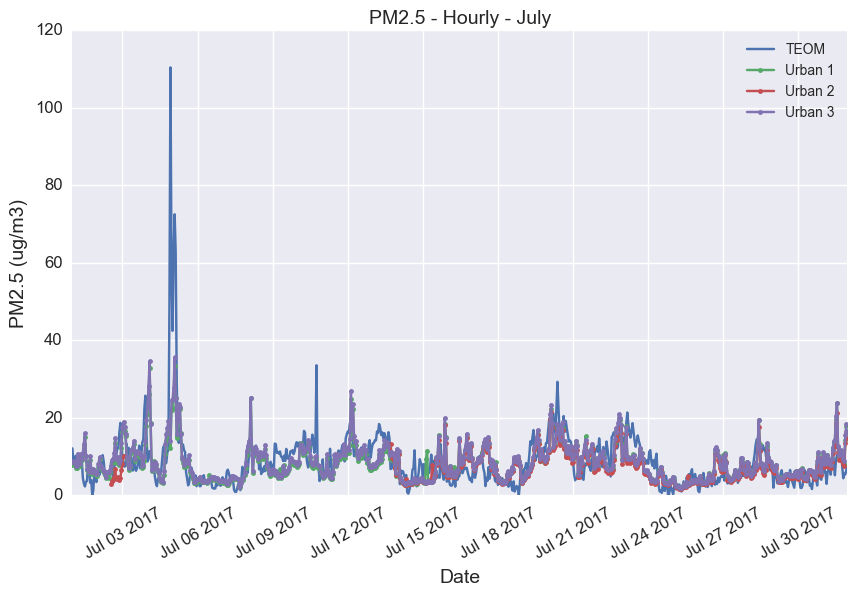

In [952]:
calib=df_hr_jul['PM2.5 (ug/m3)'].mean()/df_hr_jul['pm25-3'].mean()

plt.figure(figsize=(10,6))
plt.plot(df_hr_jul['date'],df_hr_jul['PM2.5 (ug/m3)'],label='TEOM')
plt.plot(df_hr_jul['date'],df_hr_jul['pm25-1']*calib,'.-',label='Urban 1')
plt.plot(df_hr_jul['date'],df_hr_jul['pm25-2']*calib,'.-',label='Urban 2')
plt.plot(df_hr_jul['date'],df_hr_jul['pm25-3']*calib,'.-',label='Urban 3')
plt.title('PM2.5 - Hourly - July',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.legend()

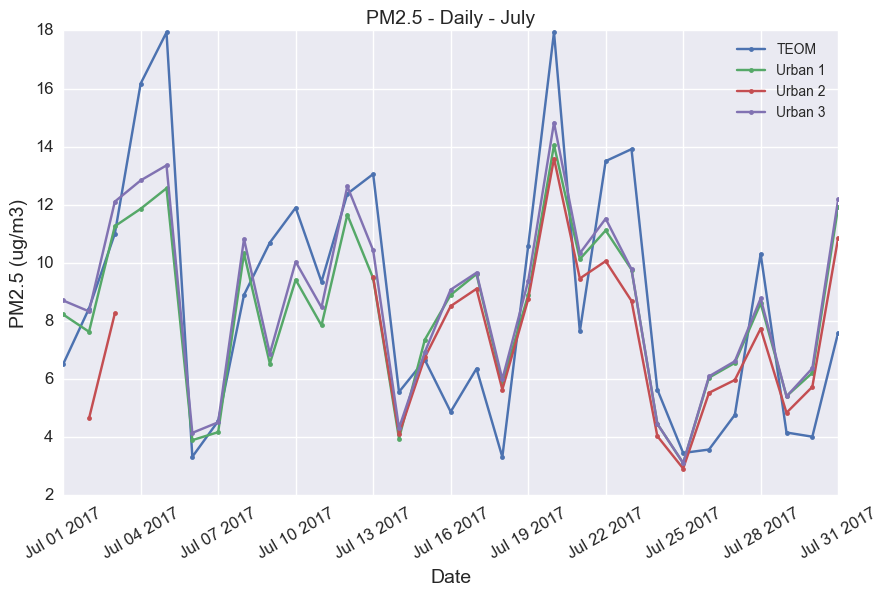

In [954]:
calib=df_daily_jul['PM2.5 (ug/m3)'].mean()/df_daily_jul['pm25-3'].mean()

plt.figure(figsize=(10,6))
plt.plot(df_daily_jul['date'],df_daily_jul['PM2.5 (ug/m3)'],'.-',label='TEOM')
plt.plot(df_daily_jul['date'],df_daily_jul['pm25-1']*calib,'.-',label='Urban 1')
plt.plot(df_daily_jul['date'],df_daily_jul['pm25-2']*calib,'.-',label='Urban 2')
plt.plot(df_daily_jul['date'],df_daily_jul['pm25-3']*calib,'.-',label='Urban 3')
plt.title('PM2.5 - Daily - July',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.legend()

In [961]:
pd.DataFrame.corr(hr)

,PM2.5 (ug/m3),PM10 (ug/m3),TNC (#/cm3),ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3
PM2.5 (ug/m3),1.000000,0.948944,0.081945,0.118695,0.242389,0.360584,0.449382,0.719598,0.823514,0.487669,0.482938,0.482953,0.461772,0.457414,0.457420,0.499772,0.491108,0.491150
PM10 (ug/m3),0.948944,1.000000,0.146014,0.170261,0.295537,0.403854,0.484033,0.741167,0.796366,0.502018,0.498140,0.498178,0.482794,0.479199,0.479212,0.518661,0.512727,0.512768
TNC (#/cm3),0.081945,0.146014,1.000000,0.813005,0.626020,0.430001,0.311750,0.218090,0.109192,0.161724,0.162327,0.162371,0.178846,0.179746,0.179772,0.164452,0.167670,0.167695
ch1,0.118695,0.170261,0.813005,1.000000,0.859937,0.559114,0.358101,0.296051,0.156010,0.178360,0.178571,0.178609,0.192388,0.193021,0.193018,0.180030,0.181991,0.182008
ch2,0.242389,0.295537,0.626020,0.859937,1.000000,0.865215,0.630998,0.457745,0.290225,0.239163,0.237336,0.237343,0.253382,0.250505,0.250446,0.248277,0.245482,0.245498
ch3,0.360584,0.403854,0.430001,0.559114,0.865215,1.000000,0.899835,0.616855,0.395056,0.337541,0.335261,0.335263,0.353593,0.348050,0.347979,0.348159,0.343665,0.343682
ch4,0.449382,0.484033,0.311750,0.358101,0.630998,0.899835,1.000000,0.771475,0.434061,0.442867,0.441484,0.441504,0.444122,0.437655,0.437624,0.450415,0.447473,0.447490
ch5,0.719598,0.741167,0.218090,0.296051,0.457745,0.616855,0.771475,1.000000,0.718478,0.584316,0.581324,0.581390,0.564246,0.555415,0.555403,0.595542,0.590427,0.590456
ch6,0.823514,0.796366,0.109192,0.156010,0.290225,0.395056,0.434061,0.718478,1.000000,0.476093,0.472005,0.472071,0.445143,0.441741,0.441696,0.491345,0.484797,0.484828
ldsa-1,0.487669,0.502018,0.161724,0.178360,0.239163,0.337541,0.442867,0.584316,0.476093,1.000000,0.999618,0.999624,0.989456,0.983667,0.983659,0.992615,0.993631,0.993630


In [967]:
pd.DataFrame.corr(daily)

,PM2.5 (ug/m3),PM10 (ug/m3),TNC (#/cm3),ch1,ch2,ch3,ch4,ch5,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3
PM2.5 (ug/m3),1.000000,0.947792,0.086694,0.214358,0.364658,0.475291,0.534733,0.792942,0.933368,0.757263,0.751587,0.751625,0.731773,0.722876,0.722894,0.774059,0.765801,0.765819
PM10 (ug/m3),0.947792,1.000000,0.134789,0.257458,0.410671,0.511413,0.573894,0.818384,0.889636,0.781804,0.777655,0.777708,0.770483,0.763706,0.763735,0.802734,0.798950,0.798960
TNC (#/cm3),0.086694,0.134789,1.000000,0.781214,0.598946,0.434359,0.326878,0.260142,0.119493,0.405139,0.407772,0.407805,0.430057,0.417423,0.417461,0.394112,0.402117,0.402114
ch1,0.214358,0.257458,0.781214,1.000000,0.881393,0.659266,0.517207,0.490360,0.261992,0.594119,0.596563,0.596578,0.639230,0.624334,0.624335,0.585598,0.593855,0.593839
ch2,0.364658,0.410671,0.598946,0.881393,1.000000,0.908525,0.757374,0.641335,0.371269,0.706495,0.704166,0.704155,0.768945,0.731068,0.731038,0.714268,0.712429,0.712411
ch3,0.475291,0.511413,0.434359,0.659266,0.908525,1.000000,0.938980,0.729838,0.421714,0.785068,0.782088,0.782088,0.833466,0.786988,0.786936,0.791623,0.787457,0.787449
ch4,0.534733,0.573894,0.326878,0.517207,0.757374,0.938980,1.000000,0.813089,0.434686,0.825001,0.824160,0.824190,0.846619,0.806150,0.806112,0.825596,0.825794,0.825793
ch5,0.792942,0.818384,0.260142,0.490360,0.641335,0.729838,0.813089,1.000000,0.755708,0.879619,0.877099,0.877144,0.891421,0.855594,0.855581,0.891518,0.890245,0.890242
ch6,0.933368,0.889636,0.119493,0.261992,0.371269,0.421714,0.434686,0.755708,1.000000,0.707355,0.703728,0.703768,0.669954,0.667692,0.667688,0.722574,0.719009,0.719020
ldsa-1,0.757263,0.781804,0.405139,0.594119,0.706495,0.785068,0.825001,0.879619,0.707355,1.000000,0.999407,0.999409,0.988801,0.979642,0.979627,0.994405,0.996439,0.996439


In [969]:
hr.columns

Index(['date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'TNC (#/cm3)', 'ch1', 'ch2',
       'ch3', 'ch4', 'ch5', 'ch6', 'ldsa-1', 'pn-1', 'pm25-1', 'ldsa-2',
       'pn-2', 'pm25-2', 'ldsa-3', 'pn-3', 'pm25-3'],
      dtype='object')

In [970]:
daily.columns

Index(['date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'TNC (#/cm3)', 'ch1', 'ch2',
       'ch3', 'ch4', 'ch5', 'ch6', 'ldsa-1', 'pn-1', 'pm25-1', 'ldsa-2',
       'pn-2', 'pm25-2', 'ldsa-3', 'pn-3', 'pm25-3'],
      dtype='object')

In [975]:
io_daily.head()

,i-ldsa (µm²/cm³),i-pm (µg/m³),i-pn (1/cm³),PM2.5 (ug/m3),PM10 (ug/m3),TNC (#/cm3),ch1,ch2,ch3,ch4,...,ch6,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3
date,,,,,,,,,,,,,,,,,,,,,
2017-07-01,9.739573,4.066489,982.576463,6.515572,13.360327,20923.419762,4155.273684,3619.715789,1325.452632,671.757895,...,90.863158,30.024611,173537.999861,1.189903,NaN,NaN,NaN,32.027088,183682.006477,1.259604
2017-07-02,10.970547,6.603037,863.860589,8.430514,13.139389,19361.298611,3462.062500,3387.802083,1532.187500,989.270833,...,129.020833,27.865243,160962.627014,1.103889,26.697352,98037.194749,0.672222,30.630625,175780.348000,1.205361
2017-07-03,14.058598,9.963122,967.910653,11.003979,17.964743,20918.384722,3763.510417,3985.979167,1972.458333,1393.166667,...,152.333333,41.180104,237574.760868,1.629306,48.356842,174303.677368,1.194912,44.543739,255485.536088,1.751835
2017-07-04,14.024966,11.947298,955.544372,16.170715,20.798736,18138.090278,3544.437500,4135.250000,2061.208333,1421.208333,...,220.968750,43.407596,250209.634599,1.716132,NaN,NaN,NaN,47.275375,270868.055389,1.857292
2017-07-05,10.010711,11.951802,511.515847,17.932646,23.343222,11396.923611,1168.270833,1313.989583,902.093750,867.291667,...,200.843750,45.937500,265130.842917,1.818125,NaN,NaN,NaN,49.175143,281760.519589,1.932234


In [983]:
calib=io_daily['PM2.5 (ug/m3)'].mean()/io_daily['pm25-1'].mean()

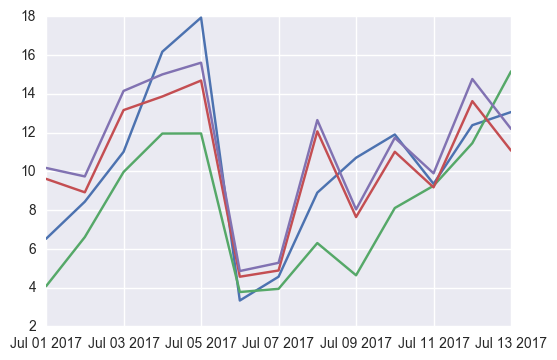

In [984]:
plt.plot(io_daily.reset_index()['date'],io_daily['PM2.5 (ug/m3)'])
plt.plot(io_daily.reset_index()['date'],io_daily['i-pm (µg/m³)'])
plt.plot(io_daily.reset_index()['date'],io_daily['pm25-1']*calib)
plt.plot(io_daily.reset_index()['date'],io_daily['pm25-3']*calib)

In [860]:
pd.DataFrame.corr(df1)

,PM2.5 (ug/m3),PM10 (ug/m3),TNC (#/cm3)
PM2.5 (ug/m3),1.000000,0.948322,0.064702
PM10 (ug/m3),0.948322,1.000000,0.120255
TNC (#/cm3),0.064702,0.120255,1.000000


In [965]:
len(daily), len(hr)

(92, 2198)

In [862]:
print(pd.DataFrame.corr(df1_jul))
print()
print(pd.DataFrame.corr(df1_aug))
print()
print(pd.DataFrame.corr(df1_sep))

               PM2.5 (ug/m3)  PM10 (ug/m3)  TNC (#/cm3)
PM2.5 (ug/m3)       1.000000      0.974742     0.098259
PM10 (ug/m3)        0.974742      1.000000     0.152699
TNC (#/cm3)         0.098259      0.152699     1.000000

               PM2.5 (ug/m3)  PM10 (ug/m3)  TNC (#/cm3)
PM2.5 (ug/m3)       1.000000      0.971974     0.087650
PM10 (ug/m3)        0.971974      1.000000     0.110623
TNC (#/cm3)         0.087650      0.110623     1.000000

               PM2.5 (ug/m3)  PM10 (ug/m3)  TNC (#/cm3)
PM2.5 (ug/m3)       1.000000      0.891184     0.102900
PM10 (ug/m3)        0.891184      1.000000     0.252328
TNC (#/cm3)         0.102900      0.252328     1.000000


In [863]:
print(pd.DataFrame.corr(df2_jul))
print()
print(pd.DataFrame.corr(df2_aug))
print()
print(pd.DataFrame.corr(df2_sep))

          ch1       ch2       ch3       ch4       ch5       ch6
ch1  1.000000  0.846823  0.562479  0.392639  0.276145  0.145172
ch2  0.846823  1.000000  0.883115  0.676534  0.437973  0.295269
ch3  0.562479  0.883115  1.000000  0.907034  0.569993  0.397049
ch4  0.392639  0.676534  0.907034  1.000000  0.720488  0.447657
ch5  0.276145  0.437973  0.569993  0.720488  1.000000  0.786554
ch6  0.145172  0.295269  0.397049  0.447657  0.786554  1.000000

          ch1       ch2       ch3       ch4       ch5       ch6
ch1  1.000000  0.794257  0.456063  0.290459  0.244470  0.174990
ch2  0.794257  1.000000  0.858097  0.637799  0.488549  0.393272
ch3  0.456063  0.858097  1.000000  0.906274  0.661384  0.526166
ch4  0.290459  0.637799  0.906274  1.000000  0.811044  0.554991
ch5  0.244470  0.488549  0.661384  0.811044  1.000000  0.686756
ch6  0.174990  0.393272  0.526166  0.554991  0.686756  1.000000

          ch1       ch2       ch3       ch4       ch5       ch6
ch1  1.000000  0.941948  0.674365  0.3

In [864]:
print(pd.DataFrame.corr(df1_hr))
print()
print(pd.DataFrame.corr(df2_hr))

               PM2.5 (ug/m3)  PM10 (ug/m3)  TNC (#/cm3)
PM2.5 (ug/m3)       1.000000      0.948944     0.081945
PM10 (ug/m3)        0.948944      1.000000     0.146014
TNC (#/cm3)         0.081945      0.146014     1.000000

          ch1       ch2       ch3       ch4       ch5       ch6
ch1  1.000000  0.860039  0.559808  0.359270  0.297177  0.157217
ch2  0.860039  1.000000  0.865529  0.631807  0.458691  0.291601
ch3  0.559808  0.865529  1.000000  0.900029  0.617533  0.396467
ch4  0.359270  0.631807  0.900029  1.000000  0.771722  0.435005
ch5  0.297177  0.458691  0.617533  0.771722  1.000000  0.719018
ch6  0.157217  0.291601  0.396467  0.435005  0.719018  1.000000
